# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [44]:
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [45]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [46]:
df_temp = df.temperature
df_temp.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [53]:
mean = df_temp.mean()
mean

98.24923076923078

In [54]:
std = df_temp.std()
std

0.7331831580389454

In [55]:
mean, std = 98.24923076923078, 0.7331831580389454
temperature = scipy.stats.norm(mean, std)

In [56]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

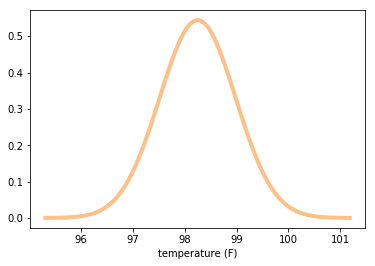

In [57]:
xs, ys = eval_pdf(temperature)
pyplot.plot(xs, ys, label='temp', linewidth=4, color=COLOR3)
pyplot.xlabel('temperature (F)')
None

In [58]:
df_temp

0       99.3
1       98.4
2       97.8
3       99.2
4       98.0
5       99.2
6       98.0
7       98.8
8       98.4
9       98.6
10      98.8
11      96.7
12      98.2
13      98.7
14      97.8
15      98.8
16      98.3
17      98.2
18      97.2
19      99.4
20      98.3
21      98.2
22      98.6
23      98.4
24      97.8
25      98.0
26      97.8
27      98.2
28      98.4
29      98.1
       ...  
100     99.0
101     98.5
102     98.0
103     99.4
104     97.6
105     96.7
106     97.0
107     98.6
108     98.7
109     97.3
110     98.8
111     98.0
112     98.2
113     99.1
114     99.0
115     98.0
116    100.8
117     97.8
118     98.7
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
124     97.5
125     96.3
126     97.7
127     98.2
128     97.9
129     98.7
Name: temperature, dtype: float64

In [60]:
#independence of observations
observed = df_temp
expected = 129 * mean   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

1622193.8163240799
